In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("seaborn")

In [83]:
dfx=pd.read_csv("xdata.csv")
dfy=pd.read_csv("ydata.csv")

In [84]:
dfx.head()

,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858


In [85]:
dfy.head()

,0,0.0
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [86]:
x=dfx.values
y=dfy.values

In [87]:
x=x[:,1:]
y=y[:,1:].reshape((-1))

In [88]:
print(x.shape)
print(y.shape)

(399, 2)
(399,)


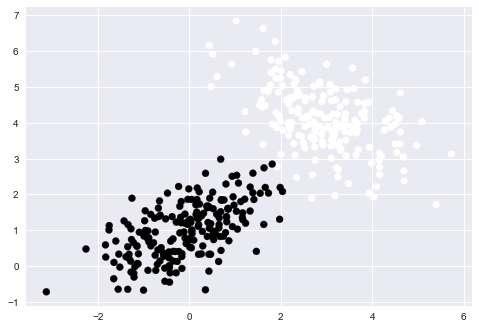

In [89]:
plt.scatter(x[:,0],x[:,1],c=y)

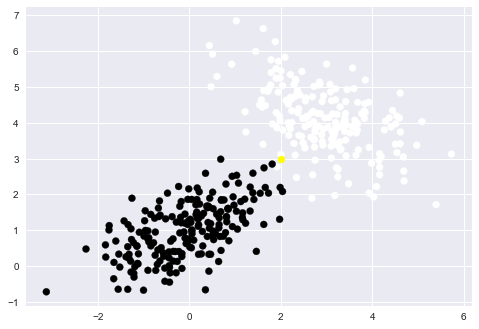

In [90]:
query_x=np.array([2,3])
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(query_x[0],query_x[1],color='yellow')

In [91]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,querypoint,k=5):
    vals=[]
    m=x.shape[0]
    for i in range(m):
        d=dist(querypoint,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    #Nearest k points
    vals=vals[:k]
    vals=np.array(vals)
    
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    pred=new_vals[1].argmax()
    return pred
        

In [92]:
X=knn(x,y,query_x)
print(X)

0


## Recognising handwritten MNIST Dataset using knn

In [47]:
df=pd.read_csv("mnist_test.csv")

In [48]:
print(df.shape)

(10000, 785)


In [49]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [50]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data=df.values

In [52]:
print(type(data))

<class 'numpy.ndarray'>


In [55]:
X=data[:,1:]
Y=data[:,0]
print(x.shape,y.shape)

(10000, 784) (10000,)


In [56]:
split=int(0.8*x.shape[0])

In [57]:
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(8000, 784) (8000,) (2000, 784) (2000,)


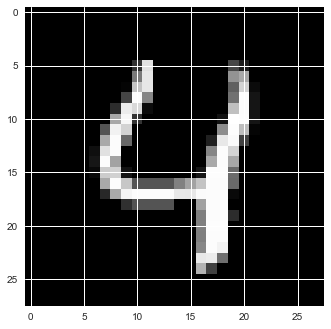

4


In [107]:
def drawing(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawing(X_train[4])
print(Y_train[4])

In [108]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [109]:
pred=knn(X_train,Y_train,X_test[9])
print(int(pred))

8


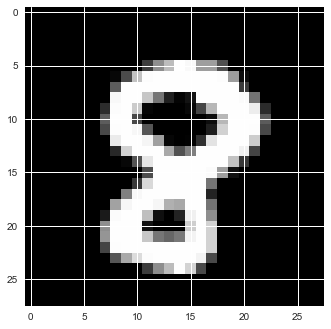

8


In [110]:
drawing(X_test[9])
print(Y_test[9])